In [2]:
import torch

print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU name:", torch.cuda.get_device_name(0))
    print("Running on GPU")
else:
    device = torch.device("cpu")
    print("Running on CPU")


CUDA available: False
Running on CPU


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/Fashion_MNIST.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
df_train.shape

(60000, 785)

In [ ]:
df_test.shape

(10000, 785)

In [ ]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [ ]:
X_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train.values

array([2, 9, 6, ..., 8, 8, 7])

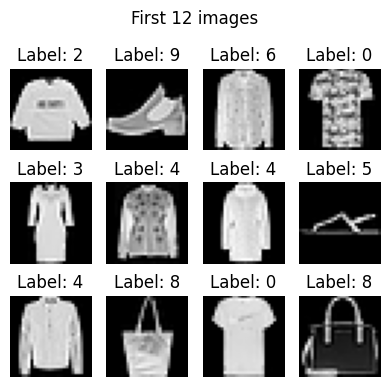

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(4, 4))
fig.suptitle('First 12 images', fontsize=12)

for i in range(3):
  for j in range(4):
    axes[i, j].imshow(X_train.values[i * 4 + j].reshape(28, 28), cmap='gray')
    axes[i, j].axis('off')
    axes[i, j].set_title(f'Label: {y_train.values[i * 4 + j]}')

plt.tight_layout()
plt.show()

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [ ]:
X_train_tensor = X_train_tensor/255.0
X_test_tensor = X_test_tensor/255.0

In [ ]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]



In [ ]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [ ]:
class NeuralNetwork(nn.Module):

  def __init__(self, num_features):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, row):
    return self.model(row)

In [ ]:
epochs = 25
learning_rate = 0.001

In [ ]:
model = NeuralNetwork(X_train_tensor.shape[1])
model = model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(epochs):

  total_loss = 0.0

  for batch_features, batch_labels in train_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    optimizer.zero_grad()
    y_pred = model(batch_features)
    loss = loss_function(y_pred, batch_labels)

    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  print(f'Epoch: {epoch+1}, Loss: {total_loss/len(train_loader)}')

Epoch: 1, Loss: 0.5267874267896017
Epoch: 2, Loss: 0.37954597298701603
Epoch: 3, Loss: 0.34122665505806604
Epoch: 4, Loss: 0.3171221801261107
Epoch: 5, Loss: 0.3021915700217088
Epoch: 6, Loss: 0.2869742757221063
Epoch: 7, Loss: 0.275395305754741
Epoch: 8, Loss: 0.26455002391934396
Epoch: 9, Loss: 0.2536242473393679
Epoch: 10, Loss: 0.24457177381614845
Epoch: 11, Loss: 0.23450857610106468
Epoch: 12, Loss: 0.22852839559714
Epoch: 13, Loss: 0.2218133047491312
Epoch: 14, Loss: 0.21703579589376848
Epoch: 15, Loss: 0.20915034178396066
Epoch: 16, Loss: 0.2039773371050755
Epoch: 17, Loss: 0.1962868992914756
Epoch: 18, Loss: 0.1919843764151136
Epoch: 19, Loss: 0.18604687896668912
Epoch: 20, Loss: 0.18123759703040124
Epoch: 21, Loss: 0.17509005126133562
Epoch: 22, Loss: 0.17216486979325613
Epoch: 23, Loss: 0.16823545083577435
Epoch: 24, Loss: 0.16392053364813328
Epoch: 25, Loss: 0.16010896864111224


In [ ]:
model.eval()

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
y_pred.shape

torch.Size([32, 10])

In [ ]:
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    y_pred_test = model(batch_features)
    total += len(batch_features)
    correct += (torch.argmax(y_pred_test, 1) == batch_labels).float().sum().item()

print(f'Accuracy: {correct/total}')

Accuracy: 0.8941


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 25.2 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
class myNN(nn.Module):

  def __init__(self, num_features, output_dim, num_hidden_layers, num_nodes, drop_rate):
    super().__init__()
    layers = []
    for i in range(num_hidden_layers):
      layers.append(nn.Linear(num_features, num_nodes))
      layers.append(nn.BatchNorm1d(num_nodes))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(drop_rate))
      num_features = num_nodes
    layers.append(nn.Linear(num_features, output_dim))
    self.model = nn.Sequential(*layers)

  def forward(self, row):
    return self.model(row)

In [ ]:
def objective(trial):

  num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 4, step=1)
  num_nodes = trial.suggest_int('num_nodes', 32, 256, step=32)
  drop_rate = trial.suggest_float('drop_rate', 0.1, 0.5, step=0.1)
  epochs = trial.suggest_int('epochs', 10, 100, step=10)
  learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
  optimizer = trial.suggest_categorical('optimizer', ['Adam', 'SGD', 'RMSprop'])
  batch_size = trial.suggest_int('batch_size', 32, 128, step=16)
  weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-3, log=True)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

  model = myNN(X_train_tensor.shape[1], 10, num_hidden_layers, num_nodes, drop_rate)
  model = model.to(device)

  loss_function = nn.CrossEntropyLoss()
  if optimizer == 'Adam':
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)
  elif optimizer == 'RMSprop':
    optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

  for epoch in range(epochs):

    for batch_features, batch_labels in train_loader:
      batch_features = batch_features.to(device)
      batch_labels = batch_labels.to(device)

      optimizer.zero_grad()
      y_pred_train = model(batch_features)
      loss = loss_function(y_pred_train, batch_labels)

      loss.backward()
      optimizer.step()

  model.eval()
  total = 0
  correct = 0

  with torch.no_grad():

    for batch_features_test, batch_labels_test in test_loader:
      batch_features_test = batch_features_test.to(device)
      batch_labels_test = batch_labels_test.to(device)

      y_pred_test = model(batch_features_test) # Corrected this line
      total += len(batch_features_test) # Corrected this line
      correct += (torch.argmax(y_pred_test, 1) == batch_labels_test).float().sum().item() # Corrected this line
    accuracy = correct/total

  return accuracy

In [ ]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())

[I 2025-08-30 03:55:38,915] A new study created in memory with name: no-name-44794754-2f26-49f3-b82b-240b60fd9767


In [ ]:
study.optimize(objective, n_trials=25)

[I 2025-08-30 04:03:48,242] Trial 3 finished with value: 0.8453 and parameters: {'num_hidden_layers': 4, 'num_nodes': 32, 'drop_rate': 0.4, 'epochs': 30, 'learning_rate': 0.0014532688315182542, 'optimizer': 'Adam', 'batch_size': 112, 'weight_decay': 2.3311292946200776e-05}. Best is trial 0 with value: 0.9016.
[I 2025-08-30 04:04:48,582] Trial 4 finished with value: 0.71 and parameters: {'num_hidden_layers': 3, 'num_nodes': 32, 'drop_rate': 0.1, 'epochs': 20, 'learning_rate': 1.1881628375302286e-05, 'optimizer': 'SGD', 'batch_size': 80, 'weight_decay': 0.00014523195697200357}. Best is trial 0 with value: 0.9016.
[I 2025-08-30 04:09:49,930] Trial 5 finished with value: 0.8454 and parameters: {'num_hidden_layers': 3, 'num_nodes': 64, 'drop_rate': 0.4, 'epochs': 100, 'learning_rate': 4.085656896812815e-05, 'optimizer': 'SGD', 'batch_size': 80, 'weight_decay': 2.608256405489155e-05}. Best is trial 0 with value: 0.9016.
[I 2025-08-30 04:10:16,993] Trial 6 finished with value: 0.7849 and para

In [ ]:
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')